In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
pd.set_option("max_rows", None)

In [45]:
df=pd.read_csv("avocado.csv",parse_dates=["Date"])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [50]:
def missing_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Missing Values'})
        mz_table['Attributes'] = df.nunique()
        mz_table['Data Type'] = df.dtypes
        
        
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
               )

        return mz_table

missing_values_table(df)

Your selected dataframe has 14 columns and 18249 Rows.



,Zero Values,Missing Values,% of Total Missing Values,Attributes,Data Type
Unnamed: 0,432,0,0.0,53,int64
Date,0,0,0.0,169,datetime64[ns]
AveragePrice,0,0,0.0,259,float64
Total Volume,0,0,0.0,18237,float64
4046,242,0,0.0,17702,float64
4225,61,0,0.0,18103,float64
4770,5497,0,0.0,12071,float64
Total Bags,15,0,0.0,18097,float64
Small Bags,159,0,0.0,17321,float64
Large Bags,2370,0,0.0,15082,float64


# Lets again chcek the value counts

In [51]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

conventional    9126
organic         9123
Name: type, dtype: int64

Atlanta                338
Columbus               338
Midsouth               338
RichmondNorfolk        338
Louisville             338
MiamiFtLauderdale      338
SouthCarolina          338
CincinnatiDayton       338
Spokane                338
West                   338
NewYork                338
LasVegas               338
Southeast              338
BaltimoreWashington    338
Albany                 338
HartfordSpringfield    338
Philadelphia           338
StLouis                338
Boise                  338
Nashville              338
Pittsburgh             338
SanFrancisco           338
Detroit                338
GreatLakes             338
DallasFtWorth          338
Syracuse               338
PhoenixTucson          338
LosAngeles             338
Tampa                  338
Boston                 338
NewOrleansMobile       338
GrandRapids            338
HarrisburgScranton     338
California             338
Jacksonville  

# Handling Categorical Data

# Binary Categorical Attribures

# 1.Label Encoading

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [54]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,WestTexNewMexico


# Multi Categorical Attributes

# 2.One Hot Encoding

In [55]:
df1 = pd.get_dummies(df['region'],drop_first=True)

In [56]:
df1.shape

(18249, 53)

In [57]:
df_final = pd.concat([df1,df],axis=1)

In [58]:
df_final.shape

(18249, 67)

In [59]:
df_final.head()

,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,Columbus,DallasFtWorth,Denver,Detroit,GrandRapids,GreatLakes,HarrisburgScranton,HartfordSpringfield,Houston,Indianapolis,Jacksonville,LasVegas,LosAngeles,Louisville,MiamiFtLauderdale,Midsouth,Nashville,NewOrleansMobile,NewYork,Northeast,NorthernNewEngland,Orlando,Philadelphia,PhoenixTucson,Pittsburgh,Plains,Portland,RaleighGreensboro,RichmondNorfolk,Roanoke,Sacramento,SanDiego,SanFrancisco,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


In [60]:
df_final = df_final.drop(['region','Unnamed: 0','Date'],axis=1)

In [61]:
df_final.shape

(18249, 64)

In [62]:
df_final.columns

Index(['Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester',
       'California', 'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus',
       'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids', 'GreatLakes',
       'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 'Indianapolis',
       'Jacksonville', 'LasVegas', 'LosAngeles', 'Louisville',
       'MiamiFtLauderdale', 'Midsouth', 'Nashville', 'NewOrleansMobile',
       'NewYork', 'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral',
       'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS',
       'West', 'WestTexNewMexico', 'AveragePrice', 'Total Volume', '4046',
       '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year'],
      dtyp

# Check The Correlation

In [63]:
df_final.corr()

,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,Columbus,DallasFtWorth,Denver,Detroit,GrandRapids,GreatLakes,HarrisburgScranton,HartfordSpringfield,Houston,Indianapolis,Jacksonville,LasVegas,LosAngeles,Louisville,MiamiFtLauderdale,Midsouth,Nashville,NewOrleansMobile,NewYork,Northeast,NorthernNewEngland,Orlando,Philadelphia,PhoenixTucson,Pittsburgh,Plains,Portland,RaleighGreensboro,RichmondNorfolk,Roanoke,Sacramento,SanDiego,SanFrancisco,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
Atlanta,1.000000,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018786,-0.023205,-0.023409,-0.015952,-0.030112,-0.028799,-0.021610,-0.024042,-0.012539,-0.017731,0.000023,0.000004
BaltimoreWashington,-0.018871,1.000000,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018786,0.043754,-0.017983,-0.027948,-0.005610,-0.013260,-0.018830,-0.014960,-0.028962,-0.019365,0.000023,0.000004
Boise,-0.018871,-0.018871,1.000000,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018786,-0.019733,-0.032141,-0.029646,-0.033279,-0.025123,-0.031155,-0.030995,-0.029413,-0.023880,0.000023,0.000004
Boston,-0.018871,-0.018871,-0.018871,1.000000,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018786,0.042614,-0.022389,-0.031278,-0.009234,-0.022828,-0.024521,-0.022698,-0.028098,-0.022170,0.000023,0.000004
BuffaloRochester,-0.018871,-0.018871,-0.018871,-0.018871,1.000000,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018786,0.037819,-0.031135,-0.031627,-0.030061,-0.029012,-0.028595,-0.027950,-0.028498,-0.022238,0.000023,0.000004
California,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871

# Assign The Values

In [64]:
x = df_final.drop(['AveragePrice'],axis=1)
y = df_final['AveragePrice']

# Using Feature Scaling

In [65]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scale = sc.fit_transform(x)
df_scale = pd.DataFrame(df_scale,columns=x.columns)

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Atlanta              18249 non-null  uint8  
 1   BaltimoreWashington  18249 non-null  uint8  
 2   Boise                18249 non-null  uint8  
 3   Boston               18249 non-null  uint8  
 4   BuffaloRochester     18249 non-null  uint8  
 5   California           18249 non-null  uint8  
 6   Charlotte            18249 non-null  uint8  
 7   Chicago              18249 non-null  uint8  
 8   CincinnatiDayton     18249 non-null  uint8  
 9   Columbus             18249 non-null  uint8  
 10  DallasFtWorth        18249 non-null  uint8  
 11  Denver               18249 non-null  uint8  
 12  Detroit              18249 non-null  uint8  
 13  GrandRapids          18249 non-null  uint8  
 14  GreatLakes           18249 non-null  uint8  
 15  HarrisburgScranton   18249 non-null 

# Handling the Skewness

In [66]:
from scipy.stats import skew

In [67]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
dtype: float64

In [68]:
#Lets treat the skewness
import numpy as np
for index in df_final.skew().index:
    if df_final.skew().loc[index]>0.5:
        df_final[index]=np.cbrt(df_final[index])
    if df_final.skew().loc[index]<-0.5:
        df_final[index]=np.cbrt(df_final[index])

Atlanta
7.14453125


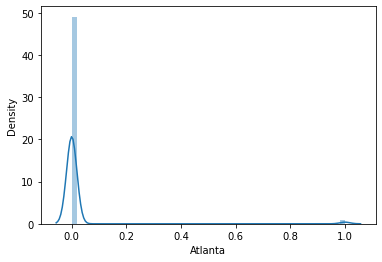

BaltimoreWashington
7.14453125


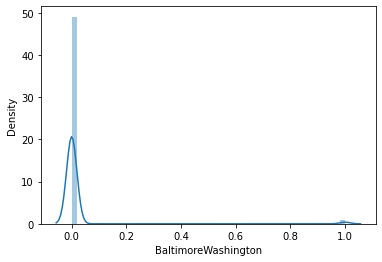

Boise
7.14453125


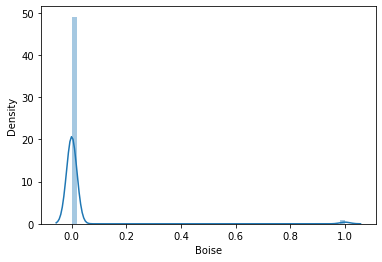

Boston
7.14453125


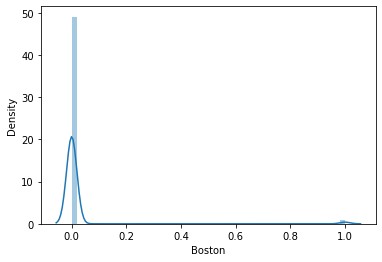

BuffaloRochester
7.14453125


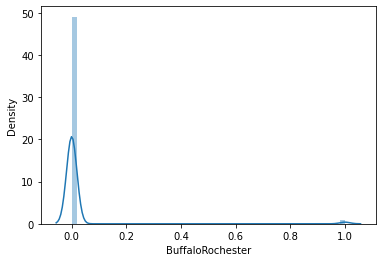

California
7.14453125


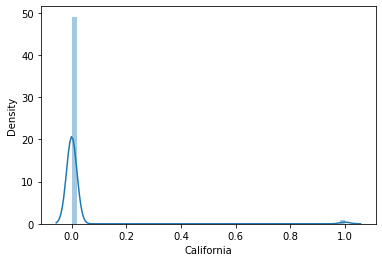

Charlotte
7.14453125


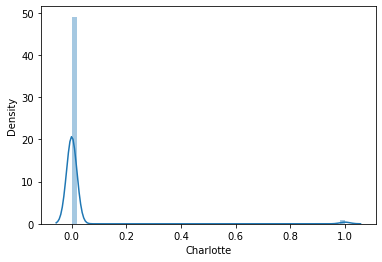

Chicago
7.14453125


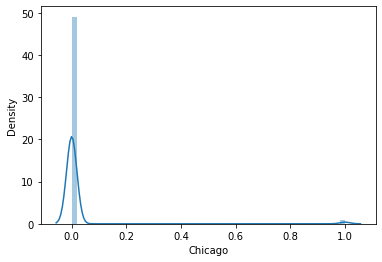

CincinnatiDayton
7.14453125


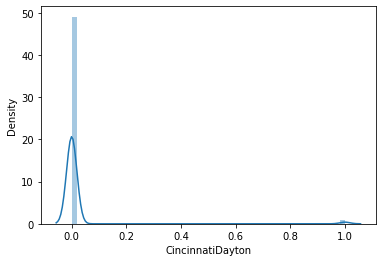

Columbus
7.14453125


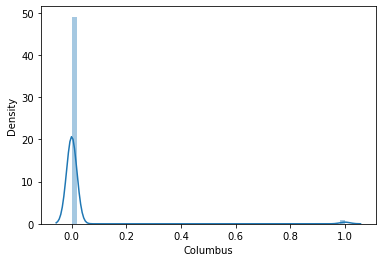

DallasFtWorth
7.14453125


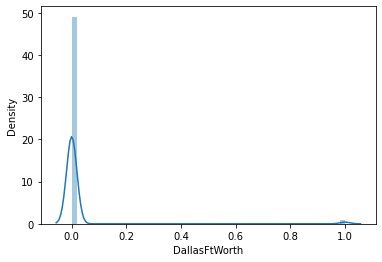

Denver
7.14453125


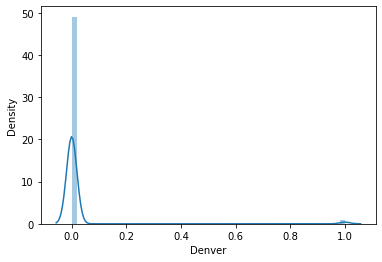

Detroit
7.14453125


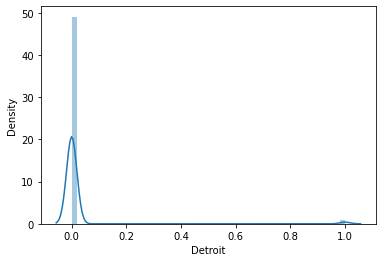

GrandRapids
7.14453125


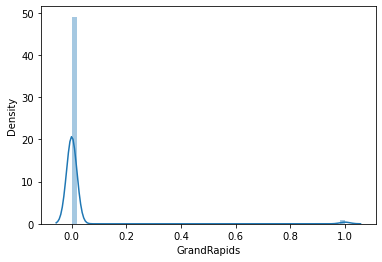

GreatLakes
7.14453125


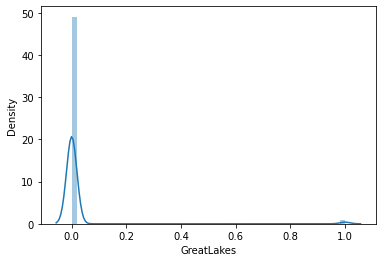

HarrisburgScranton
7.14453125


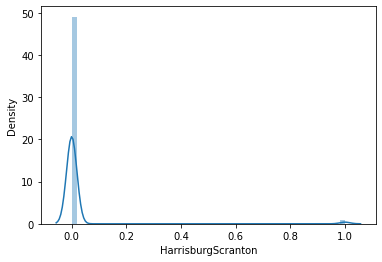

HartfordSpringfield
7.14453125


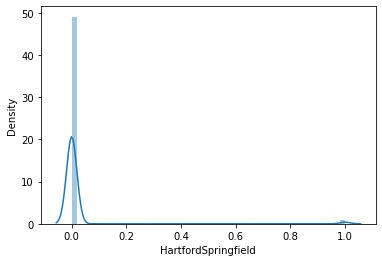

Houston
7.14453125


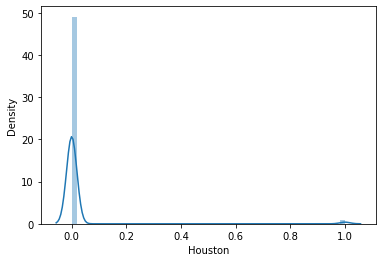

Indianapolis
7.14453125


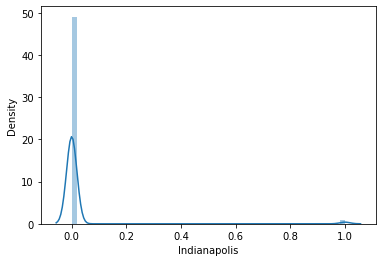

Jacksonville
7.14453125


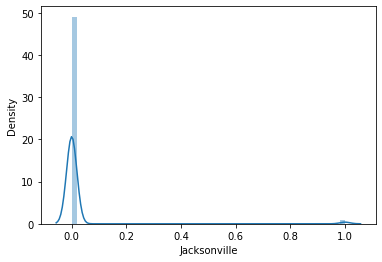

LasVegas
7.14453125


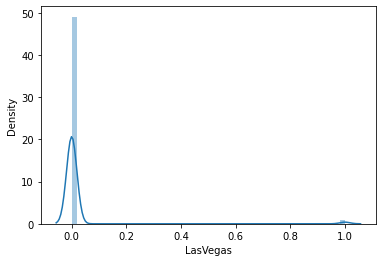

LosAngeles
7.14453125


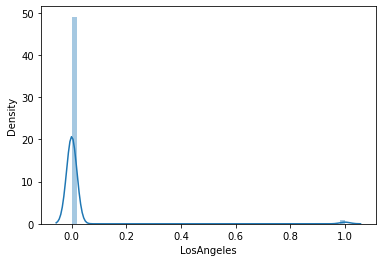

Louisville
7.14453125


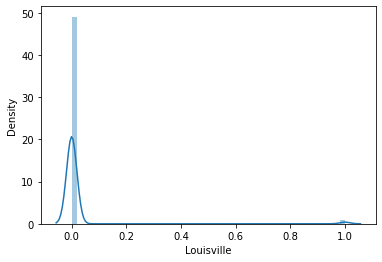

MiamiFtLauderdale
7.14453125


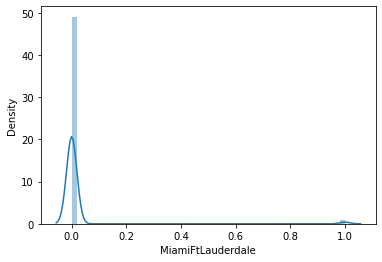

Midsouth
7.14453125


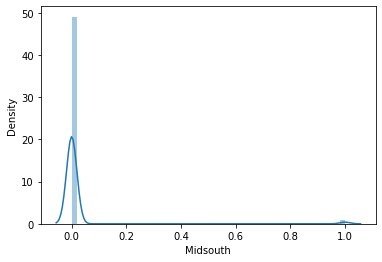

Nashville
7.14453125


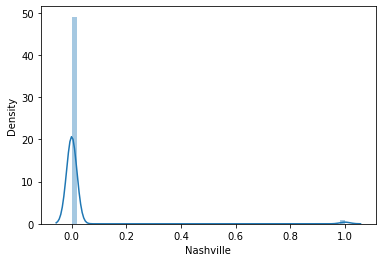

NewOrleansMobile
7.14453125


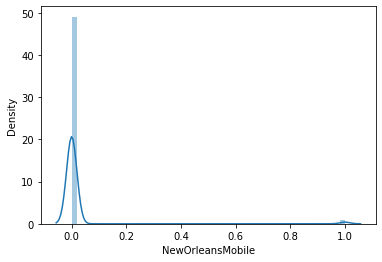

NewYork
7.14453125


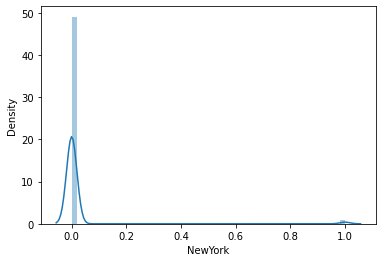

Northeast
7.14453125


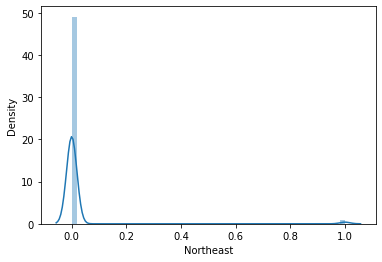

NorthernNewEngland
7.14453125


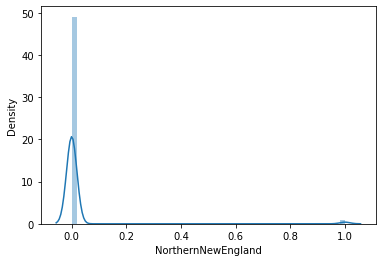

Orlando
7.14453125


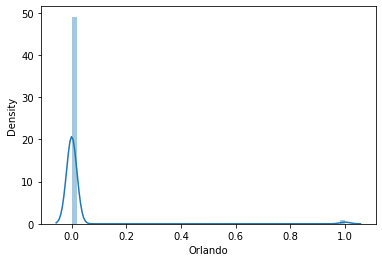

Philadelphia
7.14453125


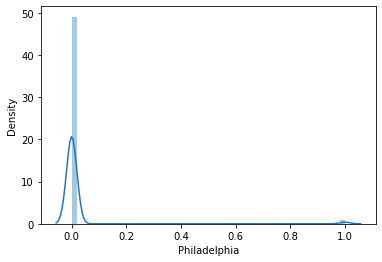

PhoenixTucson
7.14453125


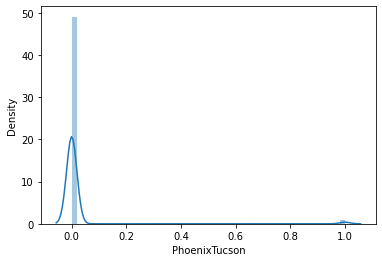

Pittsburgh
7.14453125


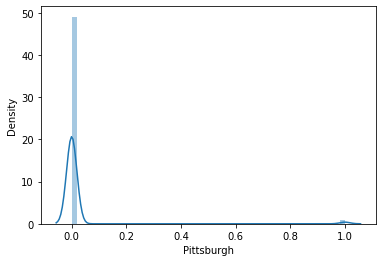

Plains
7.14453125


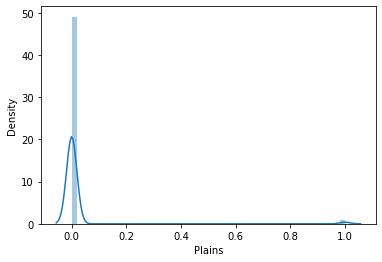

Portland
7.14453125


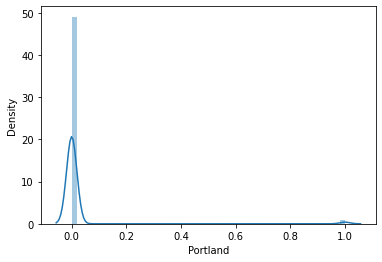

RaleighGreensboro
7.14453125


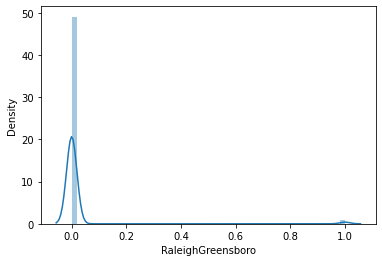

RichmondNorfolk
7.14453125


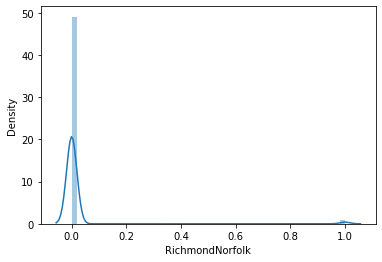

Roanoke
7.14453125


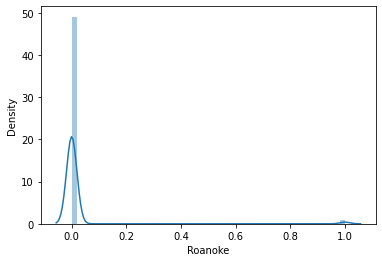

Sacramento
7.14453125


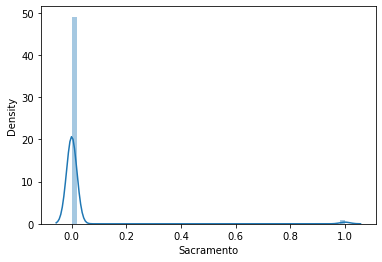

SanDiego
7.14453125


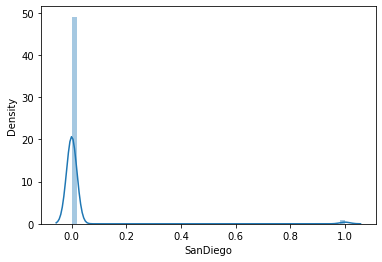

SanFrancisco
7.14453125


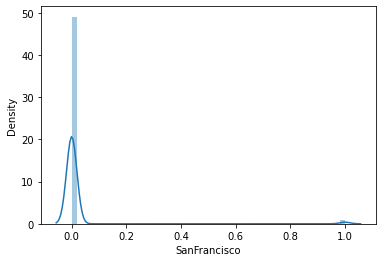

Seattle
7.14453125


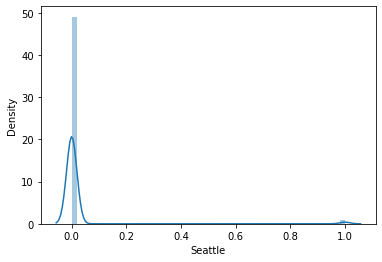

SouthCarolina
7.14453125


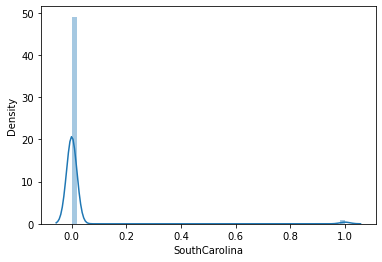

SouthCentral
7.14453125


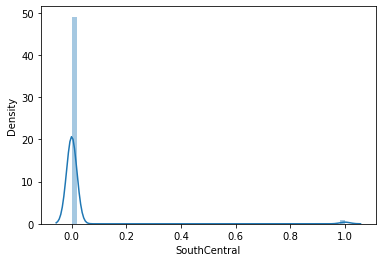

Southeast
7.14453125


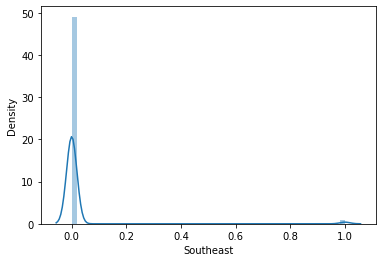

Spokane
7.14453125


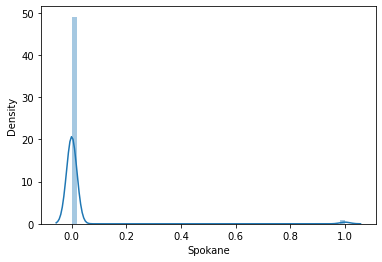

StLouis
7.14453125


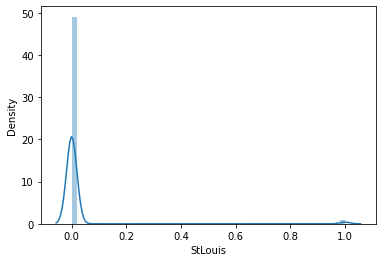

Syracuse
7.14453125


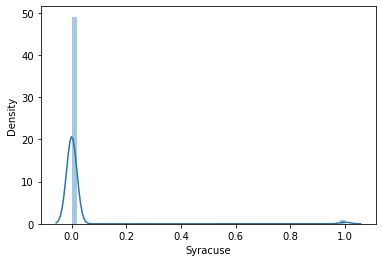

Tampa
7.14453125


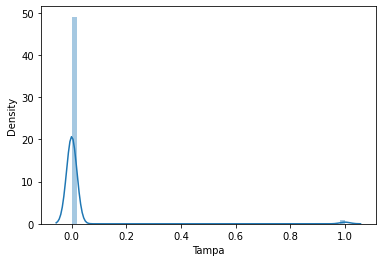

TotalUS
7.14453125


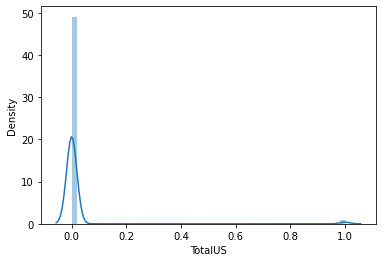

West
7.14453125


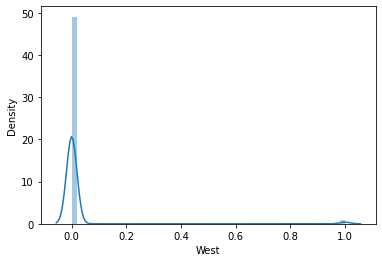

WestTexNewMexico
7.171875


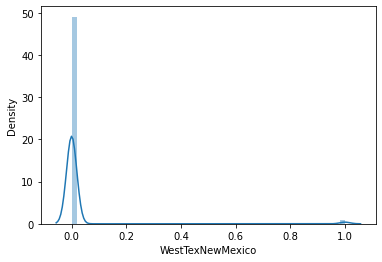

AveragePrice
0.07053391582033251


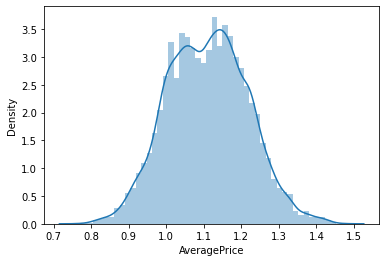

Total Volume
2.2359595981932396


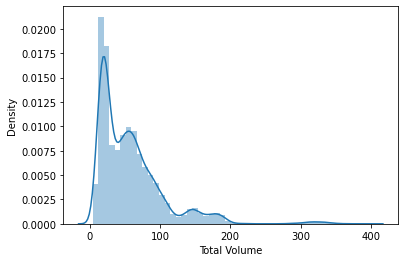

4046
2.2776742038175657


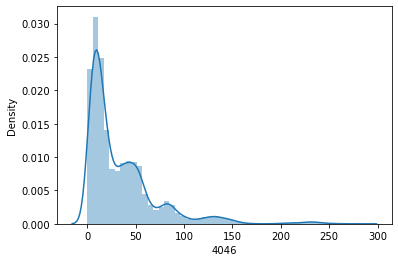

4225
2.130202483085431


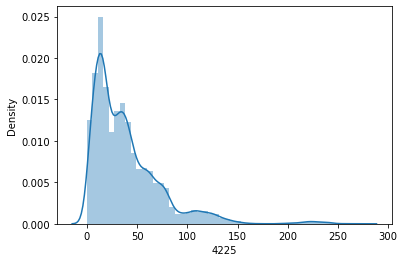

4770
2.3158578433089287


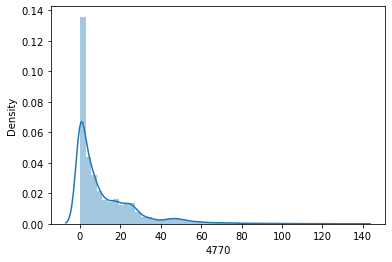

Total Bags
2.3019871005430197


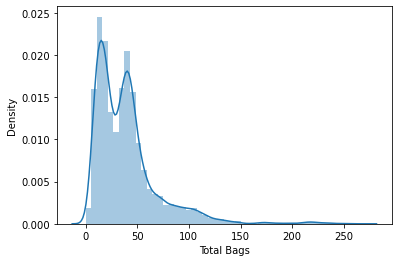

Small Bags
2.217499306227754


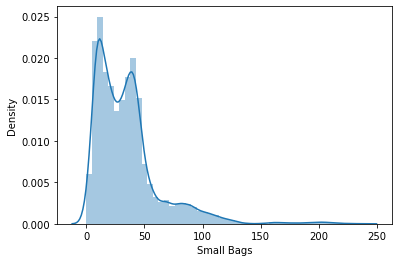

Large Bags
2.186333781367712


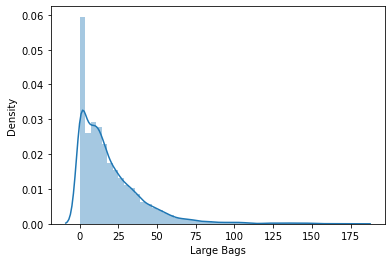

XLarge Bags
2.8420217481103354


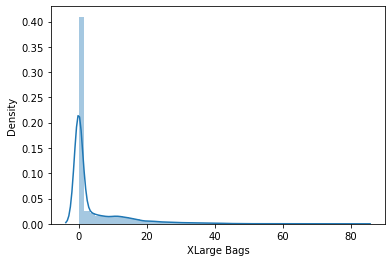

type
0.000328785143354492


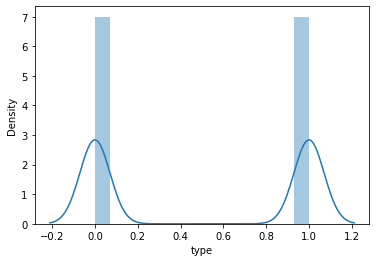

year
0.21532098630907168


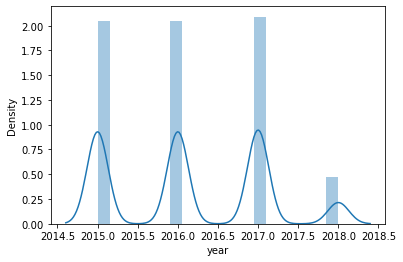

In [34]:
for col in df_final:
    print(col)
    print(skew(df_final[col]))
    
    plt.figure()
    sns.distplot(df_final[col])
    plt.show()

# Define the Function For R2_Score

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(x, y,random_state= r_state,test_size=0.20)
    
        regr.fit(X_train,y_train)

        y_pred = regr.predict(X_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state:",r_state," is:",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2 score corresponding to ", final_r_state," is ", max_r_score)
    return final_r_state

# 1.LINEAR REGRESSION

In [70]:
#ltes check the good fit for linear Regression problem
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,x,y)

r2_score corresponding to random state: 42  is: 0.5577639599727642
r2_score corresponding to random state: 43  is: 0.5698803531147837
r2_score corresponding to random state: 44  is: 0.5504676015317638
r2_score corresponding to random state: 45  is: 0.5657429972226428
r2_score corresponding to random state: 46  is: 0.558942266898579
r2_score corresponding to random state: 47  is: 0.5739972829693429
r2_score corresponding to random state: 48  is: 0.5886007823321802
r2_score corresponding to random state: 49  is: 0.5783379656426818
r2_score corresponding to random state: 50  is: 0.5931714075776942
r2_score corresponding to random state: 51  is: 0.570815935927029
r2_score corresponding to random state: 52  is: 0.5653881529703448
r2_score corresponding to random state: 53  is: 0.5633020033228808
r2_score corresponding to random state: 54  is: 0.5642287749525077
r2_score corresponding to random state: 55  is: 0.5753645214567693
r2_score corresponding to random state: 56  is: 0.57890772676876

# Cross Validation

In [71]:
#lets do the cross validation
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2").mean()
#the below cross validation score is less and it shows that we further need to improve our model using more data

-10.792181756124892

# 2.KNeighbour using GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors={"n_neighbors":range(1,25)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 24}

In [73]:
#Check the good fit
knr = KNeighborsRegressor(n_neighbors=24)
r_state = maxr2_score(knr,x,y)

r2_score corresponding to random state: 42  is: 0.6271625327483233
r2_score corresponding to random state: 43  is: 0.6541686954292283
r2_score corresponding to random state: 44  is: 0.6473267301011509
r2_score corresponding to random state: 45  is: 0.6580364859553616
r2_score corresponding to random state: 46  is: 0.6338311051905293
r2_score corresponding to random state: 47  is: 0.6545169615266175
r2_score corresponding to random state: 48  is: 0.6584708525362759
r2_score corresponding to random state: 49  is: 0.6545312276305417
r2_score corresponding to random state: 50  is: 0.666171247481441
r2_score corresponding to random state: 51  is: 0.6538056293361325
r2_score corresponding to random state: 52  is: 0.6610324961012275
r2_score corresponding to random state: 53  is: 0.6536649436619741
r2_score corresponding to random state: 54  is: 0.6553440908330181
r2_score corresponding to random state: 55  is: 0.6464957541451299
r2_score corresponding to random state: 56  is: 0.6631921810448

# Cross Validation

In [74]:
#lets do the cross validation
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsRegressor(),x,y,cv=5,scoring="r2").mean()
#the below cross validation score is less and it shows that we further need to improve our model using more data

-0.11212262253428426

# 3.DECISION TREE

In [75]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
r_state = maxr2_score(dt,x,y)

r2_score corresponding to random state: 42  is: 0.7346081551008945
r2_score corresponding to random state: 43  is: 0.7493954911812319
r2_score corresponding to random state: 44  is: 0.7314392015887141
r2_score corresponding to random state: 45  is: 0.701717248571
r2_score corresponding to random state: 46  is: 0.740686639304545
r2_score corresponding to random state: 47  is: 0.733425576382736
r2_score corresponding to random state: 48  is: 0.7406688280286463
r2_score corresponding to random state: 49  is: 0.7479412814790172
r2_score corresponding to random state: 50  is: 0.7583857786969964
r2_score corresponding to random state: 51  is: 0.75480844091129
r2_score corresponding to random state: 52  is: 0.7540957069890779
r2_score corresponding to random state: 53  is: 0.7518316717269131
r2_score corresponding to random state: 54  is: 0.7462057105238544
r2_score corresponding to random state: 55  is: 0.7316834092286957
r2_score corresponding to random state: 56  is: 0.7529467276633377
r2_

# Cross Validation

In [76]:
#lets do the cross validation
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeRegressor(),x,y,cv=5,scoring="r2").mean()
#the below cross validation score is less and it shows that we further need to improve our model using more data

-0.19249866000235077

# 4.RANDOM FOREST

In [77]:
from sklearn.ensemble import RandomForestRegressor
rtr = RandomForestRegressor()
r_state = maxr2_score(rtr,x,y)

r2_score corresponding to random state: 42  is: 0.8659367676623202
r2_score corresponding to random state: 43  is: 0.8737133974131194
r2_score corresponding to random state: 44  is: 0.8592513671021202
r2_score corresponding to random state: 45  is: 0.8618219675415683
r2_score corresponding to random state: 46  is: 0.8637423781483677
r2_score corresponding to random state: 47  is: 0.8723250280566759
r2_score corresponding to random state: 48  is: 0.8764403582169127
r2_score corresponding to random state: 49  is: 0.8661079345166474
r2_score corresponding to random state: 50  is: 0.881098726728914
r2_score corresponding to random state: 51  is: 0.8745045739176038
r2_score corresponding to random state: 52  is: 0.8759701867418322
r2_score corresponding to random state: 53  is: 0.8722028004804329
r2_score corresponding to random state: 54  is: 0.8700690750974701
r2_score corresponding to random state: 55  is: 0.8688189334612538
r2_score corresponding to random state: 56  is: 0.8811651001538

# Cross Validation

In [79]:
#lets do the cross validation
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(),x,y,cv=5,scoring="r2").mean()
#the below cross validation score is less and it shows that we further need to improve our model using more data

0.3553889008682706

# Prediction

In [84]:
#random forest IS peforming good, so we will choose KNN as our Final model
#rtr is model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 56,test_size=0.20)
rtr.fit(x_train,y_train)
y_pred=rtr.predict(x_test)

In [85]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.03686030385114887
r2_score is:  0.8801151912456331


In [86]:
#lets make the dataframe for price_pred
y_pred=pd.DataFrame(y_pred,columns=["Avacado_Price_Predict"])

In [87]:
#lets make the dataframe for price_pred
y_pred.head()

,Avacado_Price_Predict
0,1.134725
1,1.024448
2,1.033137
3,1.146907
4,1.025965


# Saving the file

In [88]:
#Lets save the submission to csv
y_pred.to_csv("Avacado_final_predict.csv",index=False)

In [ ]:
#lets save the model using joblib
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(lr,'Avacado_final_predict.pkl')